In [1]:
import pandas as pd
df = pd.read_csv("Ice_cream.csv")

C:\Users\Shree\AppData\Local\Temp\ipykernel_52060\3623895822.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [3]:
import numpy as np
x=df.iloc[:,:1]
y= df.iloc[:,-1]

total_sample = x.shape[0]

ones = np.ones(x.shape[0])

x.insert(0,"x0",ones)

theta = np.zeros((3,1))

In [4]:
x_square = np.square(x.iloc[:,1])
x.insert(2, "temp^2",x_square )
x.head()

,x0,Temperature (°C),temp^2
0,1.0,-4.662263,21.736693
1,1.0,-4.316559,18.632685
2,1.0,-4.213985,17.757668
3,1.0,-3.949661,15.599823
4,1.0,-3.578554,12.806047


In [5]:
import matplotlib.pyplot as plt
def plot_graph(x,y):
    plt.scatter(x,y)

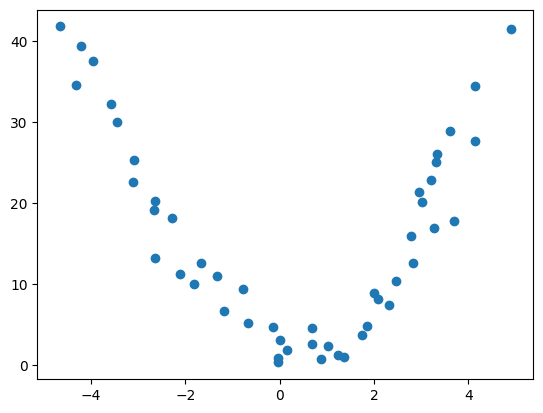

In [6]:
plot_graph(x.iloc[:,1],y)

In [7]:
x= x.to_numpy()
y= y.to_numpy().reshape((total_sample,1))

In [8]:
def hypothesis(X,O):
    return np.matmul(X,O)

In [9]:
print(x.shape)
print(theta.shape)

(49, 3)
(3, 1)


In [19]:
h = hypothesis(x,theta)

49

In [11]:
print(theta.shape)
print(x.shape)
print(y.shape)


(3, 1)
(49, 3)
(49, 1)


In [21]:
def cost_function(O,X,y,m):
    h = hypothesis(X,O)
    return (1/2 * m) * sum(np.square((h-y)))
    

In [22]:
no_of_features = x.shape[0]
cost_function(theta,x,y,total_sample)

array([12008.86632429])

In [23]:
def gradient_decent(o,alpha,x,y,m):
    cost_history=[]
    while True:
        hyp= hypothesis(x,o)
        sub=hyp-y
        prev_cost = cost_function(o,x,y,m)
        o=o-(alpha/m)*(np.matmul(np.transpose(x),sub))
        new_cost=cost_function(o,x,y,m)
        cost_history.append(new_cost)
        if new_cost == prev_cost:
            return o,cost_history

In [24]:
theta, cost_history = gradient_decent(theta,0.001,x,y,total_sample)


In [25]:
theta

array([[ 2.95176925],
       [-0.82468159],
       [ 1.82952662]])

In [29]:
def mean_square_error(h,y):
    return sum(np.square(h-y))/len(y)

In [30]:
mean_square_error(h,y)

array([10.00322059])

In [31]:
import matplotlib.pyplot as plt
def plotline(x,y,theta):
    plt.scatter(x[:,1],y)
    plt.plot(x[:,1],hypothesis(x,theta),"r")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title('Simple Plot')

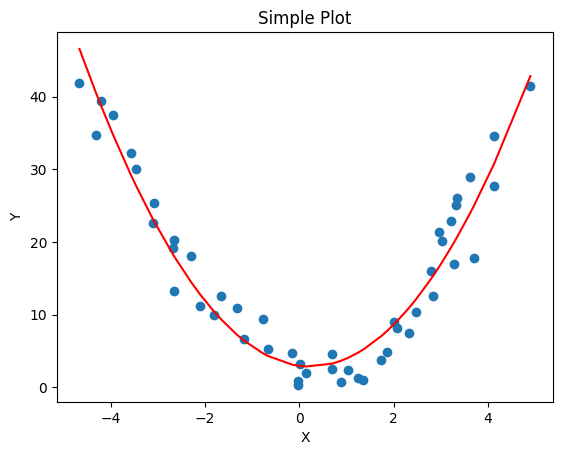

In [32]:
plotline(x,y,theta)